In [1]:
import spacy
from spacy import displacy

# Load the language model
nlp = spacy.load("en_core_web_sm")

sentence = 'Deemed universities charge huge fees'

# nlp function returns an object with individual token information,
# linguistic features and relationships
doc = nlp(sentence)

print ("{:<15} | {:<8} | {:<15} | {:<20}".format('Token','Relation','Head', 'Children'))
print ("-" * 70)

for token in doc:
  # Print the token, dependency nature, head and all dependents of the token
  print ("{:<15} | {:<8} | {:<15} | {:<20}"
         .format(str(token.text), str(token.dep_), str(token.head.text), str([child for child in token.children])))

 # Use displayCy to visualize the dependency
displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

Token           | Relation | Head            | Children            
----------------------------------------------------------------------
Deemed          | amod     | universities    | []                  
universities    | nsubj    | charge          | [Deemed]            
charge          | ROOT     | charge          | [universities, fees]
huge            | amod     | fees            | []                  
fees            | dobj     | charge          | [huge]              




### **FAQ 1: What does `nlp = spacy.load("en_core_web_sm")` do?**

**Answer:**
This line loads the small English spaCy model, which contains vocabulary, syntax rules, and statistical weights required for tasks such as tokenization, part-of-speech tagging, and dependency parsing. Without loading this model, the pipeline cannot analyze the sentence.

---

### **FAQ 2: What is the purpose of the `doc` object in spaCy?**

**Answer:**
`doc = nlp(sentence)` processes the input sentence through spaCy’s pipeline and returns a `Doc` object. This object stores tokens, linguistic annotations (POS tags, dependency relations), and the syntactic structure of the sentence. It behaves like a container of tokens with additional linguistic metadata.

---

### **FAQ 3: What are `token.head` and `token.children` in dependency parsing?**

**Answer:**

* **`token.head`**: The syntactic *parent* of a token—essentially the word it depends on in the dependency tree.
* **`token.children`**: The set of tokens for which the current token is the syntactic parent.
  These relationships together form the complete dependency graph of the sentence.

---

### **FAQ 4: Why do we use `displacy.render()` in the code?**

**Answer:**
`displacy.render(doc, style='dep')` visualizes the dependency parse tree using spaCy’s built-in visualization tool, **displaCy**. It helps users clearly see grammatical relations such as subjects, objects, and modifiers, making the syntax structure easier to understand compared to raw text output.

---

### **FAQ 5: What does the output table printed in the loop represent?**

**Answer:**
The table prints, for each token:

* **Token** – the word itself
* **Relation** – its dependency label (e.g., `nsubj`, `ROOT`, `dobj`)
* **Head** – the token it depends on
* **Children** – tokens that depend on it
  This allows you to inspect the dependency structure in a tabular, interpretable format.




In [2]:
!wget https://nlp.stanford.edu/software/stanford-corenlp-4.2.2.zip
!wget https://nlp.stanford.edu/software/stanford-corenlp-4.2.2-models-english.jar
!unzip /content/stanford-corenlp-4.2.2.zip

--2025-11-23 03:23:47--  https://nlp.stanford.edu/software/stanford-corenlp-4.2.2.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-4.2.2.zip [following]
--2025-11-23 03:23:48--  https://downloads.cs.stanford.edu/nlp/software/stanford-corenlp-4.2.2.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 504278711 (481M) [application/zip]
Saving to: ‘stanford-corenlp-4.2.2.zip’

stanford-corenlp-4. 100%[===================>] 480.92M  5.82MB/s    in 98s     

2025-11-23 03:25:25 (4.93 MB/s) - ‘stanford-corenlp-4.2.2.zip’ saved [504278711/504278711]

--2025-11-23 03:25:25--  https://nlp.st

In [3]:
from nltk.parse.stanford import StanfordDependencyParser

# Path to CoreNLP jar unzipped
jar_path = '/content/stanford-corenlp-4.2.2/stanford-corenlp-4.2.2.jar'

# Path to CoreNLP model jar
models_jar_path = '/content/stanford-corenlp-4.2.2-models-english.jar'

sentence = 'Deemed universities charge huge fees'

# Initialize StanfordDependency Parser from the path
parser = StanfordDependencyParser(path_to_jar = jar_path, path_to_models_jar = models_jar_path)

# Parse the sentence
result = parser.raw_parse(sentence)
dependency = result.__next__()


print ("{:<15} | {:<10} | {:<10} | {:<15} | {:<10}".format('Head', 'Head POS','Relation','Dependent', 'Dependent POS'))
print ("-" * 75)

# Use dependency.triples() to extract the dependency triples in the form
# ((head word, head POS), relation, (dependent word, dependent POS))
for dep in list(dependency.triples()):
  print ("{:<15} | {:<10} | {:<10} | {:<15} | {:<10}"
         .format(str(dep[0][0]),str(dep[0][1]), str(dep[1]), str(dep[2][0]),str(dep[2][1])))


/tmp/ipython-input-1167357040.py:12: DeprecationWarning: The StanfordDependencyParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPDependencyParser instead.
  parser = StanfordDependencyParser(path_to_jar = jar_path, path_to_models_jar = models_jar_path)


Head            | Head POS   | Relation   | Dependent       | Dependent POS
---------------------------------------------------------------------------
charge          | VBP        | nsubj      | universities    | NNS       
universities    | NNS        | compound   | Deemed          | NNP       
charge          | VBP        | obj        | fees            | NNS       
fees            | NNS        | amod       | huge            | JJ        





### **1️⃣ What is the purpose of downloading the CoreNLP ZIP and model JAR files?**

They provide the required Java-based parsing engine and English-language statistical models that the StanfordDependencyParser needs to perform syntactic dependency parsing.

---

### **2️⃣ Why do we create `parser = StanfordDependencyParser(...)` with two JAR paths?**

Because the parser requires:

* one JAR for the **CoreNLP engine**, and
* another JAR for the **English grammar + parsing models**.
  Only when both are supplied can the dependency parser initialize successfully.

---

### **3️⃣ What does `parser.raw_parse(sentence)` do?**

It sends the sentence text to the Stanford CoreNLP backend, which tokenizes it, analyzes its syntax, and returns a generator containing one or more possible dependency parse trees.

---

### **4️⃣ What does the loop over `dependency.triples()` signify?**

`dependency.triples()` extracts the syntactic relationships identified by the parser in the standard Stanford dependency format:

* **(head word, head POS)**
* **relation label**
* **(dependent word, dependent POS)**
  This reflects the grammatical structure of the sentence.

---

### **5️⃣ Why print a formatted table of Head, POS, Relation, and Dependent?**

The table shows the internal dependency structure produced by the parser in a clear, human-readable way — allowing you to inspect which words govern others and what grammatical relations the parser has inferred.




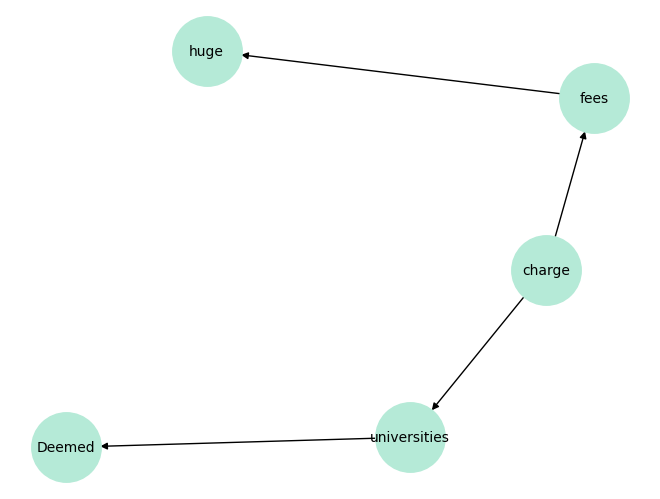

In [4]:
# importing networkx
import networkx as nx
import matplotlib.pyplot as plt
# Using reverse() to reverse the direction of edges as nx_graph() returns inverted edges
G = dependency.nx_graph().reverse()
# nx_graph() returns numeric node labels starting from 1
# Create a dictionary to map numeric nodes and words in the sentence
words = sentence.split(" ")
labels = {index + 1: words[index] for index in range(len(words))}
nx.draw(G, with_labels=True, labels=labels, node_size=2500, node_color='#B5EAD7', font_size=10)

In [5]:
!pip install graphviz
from graphviz import Source
dot_def = dependency.to_dot()
'''
The below lines require graphviz executables to be installed to your system. If that does not work, print the dot_def object and paste the output on http://graphs.grevian.org/graph/
'''
source = Source(dot_def, filename="dependency_graph", format="png")
source.view()

'dependency_graph.png'





### **1️⃣ Why do we convert the Stanford dependency parse into a NetworkX graph?**

Because `dependency.nx_graph()` gives a graph representation of the parse tree.
Using NetworkX allows us to visualize and manipulate the dependency structure using Python graph tools, instead of only text-based triples.

---

### **2️⃣ Why is `reverse()` used on the graph returned by `nx_graph()`?**

`nx_graph()` returns edges in the opposite direction (dependent → head).
Reversing the graph restores the natural linguistic direction (head → dependent), which makes the visualization more intuitive.

---

### **3️⃣ What is the purpose of the `labels` dictionary?**

`nx_graph()` uses numeric nodes (1, 2, 3...) instead of word labels.
The dictionary maps each numeric node to the actual word from the sentence so that NetworkX can display meaningful text labels for the nodes.

---

### **4️⃣ Why do we install and use Graphviz separately?**

NetworkX gives a simple Python graph visualization, but Graphviz:

* produces cleaner, more structured dependency trees
* supports special layouts like hierarchical trees
* can export to PNG, PDF, SVG, etc.

So Graphviz is used for **more polished dependency graph rendering**.

---

### **5️⃣ What does `dependency.to_dot()` signify?**

It converts the parse tree into **DOT format**, which is a graph description language.
Graphviz can read DOT definitions to generate high-quality images of the dependency structure.

This lets you open or export the complete dependency graph for presentations or documentation.




In [6]:
!pip install stanza


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 31.9 MB/s eta 0:00:00


In [7]:
import stanza
stanza.download('en')

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...


INFO:stanza:Downloaded file to /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


In [8]:
nlp = stanza.Pipeline('en', processors = 'tokenize,mwt,pos,lemma,depparse')

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


In [9]:
import stanza

# Download the language model
stanza.download('en')

sentence = 'Deemed universities charge huge fees'

# Build a Neural Pipeline
nlp = stanza.Pipeline('en', processors = "tokenize,mwt,pos,lemma,depparse")

# Pass the sentence through the pipeline
doc = nlp(sentence)

# Print the dependencies of the first sentence in the doc object
# Format - (Token, Index of head, Nature of dependency)
# Index starts from 1, 0 is reserved for ROOT
doc.sentences[0].print_dependencies()


print ("{:<15} | {:<10} | {:<15} ".format('Token', 'Relation', 'Head'))
print ("-" * 50)

# Convert sentence object to dictionary
sent_dict = doc.sentences[0].to_dict()

# iterate to print the token, relation and head
for word in sent_dict:
  print ("{:<15} | {:<10} | {:<15} "
         .format(str(word['text']),str(word['deprel']), str(sent_dict[word['head']-1]['text'] if word['head'] > 0 else 'ROOT')))


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | combined_nocharlm |
| depparse  | combined_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


('Deemed', 2, 'amod')
('universities', 3, 'nsubj')
('charge', 0, 'root')
('huge', 5, 'amod')
('fees', 3, 'obj')
Token           | Relation   | Head            
--------------------------------------------------
Deemed          | amod       | universities    
universities    | nsubj      | charge          
charge          | root       | ROOT            
huge            | amod       | fees            
fees            | obj        | charge          




### **1️⃣ Why do we install Stanza and download the English model?**

Stanza requires a separate model download for each language.
`stanza.download('en')` retrieves the English neural models for tokenization, POS tagging, lemmatization, and dependency parsing, allowing the pipeline to function.

---

### **2️⃣ What does `stanza.Pipeline('en', processors="tokenize,mwt,pos,lemma,depparse")` signify?**

You are constructing a **neural NLP pipeline** with the following components:

* **tokenize** → splits text into words
* **mwt** → multi-word token handling
* **pos** → part-of-speech tagging
* **lemma** → base form of each word
* **depparse** → neural dependency parser

This creates a full linguistic processing pipeline.

---

### **3️⃣ Why use `doc.sentences[0].print_dependencies()`?**

This method prints the dependency relationships for the first sentence in a standardized format.
It helps inspect how Stanza’s neural model interprets grammatical relations between tokens.

---

### **4️⃣ What is the purpose of converting the sentence to a dictionary (`to_dict()`)?**

`to_dict()` converts each token into a structured dictionary containing:

* text
* lemma
* POS
* dependency relation
* head index

This makes it easier to programmatically access and print token-level information.

---

### **5️⃣ Why do we map the `head` index to the actual word?**

In Stanza, the head of a dependency relation is represented as a **numeric index** (1-based).
Mapping the index back to the corresponding word makes the dependency parse **human-readable**, showing which word each token depends on.




# Introduction to NLP Annotation Pipelines in Python

**Burt Monroe (Penn State University)**

**Material for "Text as Data" at Penn State and "Advanced Text as Data" at Essex Summer School in Social Science Data Analysis**

This is an overview/refresher/primer on basic NLP tasks like segmentation, tokenization, stemming, lemmatization, part-of-speech tagging, named entity recognition, and dependency parsing with the most common Python libraries. These are generally tasks that divide the text into pieces (e.g., sentences, tokens, noun phrases), provide alternative forms for thoses pieces (e.g., lemmatization, stemming), and provide annotations/labels for those pieces (e.g., part-of-speech, position in a dependency parse tree).  There is, of course, more detail available in the documentation of each library. There is a parallel notebook for similar tasks in R here: https://colab.research.google.com/drive/15UcuXNYuhR9wuHbKp4J1HUsOB6GOX6oV?usp=sharing.

The main NLP tasks in the main packages are all organized around the concept of an annotation "pipeline" based on a given "language model." Putting aside for the moment the ability to train your own model, in essence you download/install/load a given model which can vary in the language to which it applies, how large it is (larger models have been trained on more data, but take up more space and computational resources/time), the objectives against which it was trained, and the tasks to which it can be applied. You then pass the model and the input text to the software's annotation pipeline -- in many cases with some control over particular components and order -- and receive an output object with the annotated text.

For example, the pipeline for Stanford CoreNLP is depicted below. The text is first tokenized, then split into sentences, then tokens are tagged with respect to parts of speech, then the tokens are lemmatized, then the named entity recognizer is applied, and finally the dependency parser is applied. The output is an object from which all of those annotations can be accessed.

![CoreNLP Pipeline (Source: https://stanfordnlp.github.io/CoreNLP/index.html)](https://drive.google.com/uc?id=14COzmOsaDzzWuQsziEF__73Q2cgaGPq7)

We will focus here on spaCy, Stanza/coreNLP, NLTK, and Flair. (The companion R notebook discusses spaCy, UDPipe, openNLP, coreNLP, as well as related capabilities in "text-as-data" packages quanteda, tm, and tidytext). There are other major NLP libraries, like AllenNLP and SparkNLP, that can be used for these tasks but are probably overkill; they are more likely to be helpful for higher level natural language understanding tasks.

There are some tasks -- like stemming -- where the choice of library has very little impact on the output. There are others -- like tokenization -- that vary as much or more by different settings and choices made by the analyst, than they do by library.
Some tasks -- like named entity recognition -- are very domain-dependent. On these, the performance of the different NLP pipelines out of the box varies wildly and can dramatically influence by the interaction of a particular dataset with, for example, a tokenizer choice. See, for example, this comparison of NER by spaCy (big and small models), coreNLP, and Flair, on data from the Federal Register and Tweets by American politicians. (Or this comparison of spaCy, NLTK, StanfordNLP, OpenNLP, and Gate: http://sylvainkubler.fr/wp-content/themes/biopic/images/publications/documents/SNAMS_2019.pdf)






## NLP Glossary

In this section, I repeat / gather  some general information from the slides and readings about terminology and concepts important to understanding the functionality of the NLP software packages discussed here.

A **corpus** is a digitized collection of text. "Corpus" is pluralized as **corpora**.

A **type** is an element of the vocabulary. (Sometimes the number of distinct types in the vocabulary is referred to as $V$; sometimes $V$ refers to the vocabulary as a `set`, in which case the number of distinct types is $|V|$.) A **token** is an instance of a type in running text. (We typically refer to the number of tokens in a corpus as $N$.)

**Tokenization** is the division of text into tokens. This may mean "words" split on spaces and punctuation, but even that is problematic. We may wish in some cases not to throw out punctuation (e.g.,"!!!"or "$" or `#blessed`), not to split on punctuation (e.g., `D.C.` or `burmonroe@psu.edu`), or not to split on spaces (`District of Columbia` or `Supreme Court`). Some languages have compound words that we may wish to separate into smaller units of meaning -- e.g., the Bundestag parliamentary record contains this gem:  `Verkehrswegeplanungsbeschleunigungsgesetzen` (Laws for the acceleration of the planning of traffic routes). Some languages don't have spaces (e.g., Chinese, Thai). In Chinese, a common approach is to treat individual characters (hanzi) as tokens. The presence/count/weighted count of tokens will often serve as the set of **features** used to represent documents in statistical / machine learning models. There are many many tokenizers for something like English, and most text analysis packages have a default that might not be ideal for your particular purpose.

**Segmentation** is a term that can include standard tokenization -- "Word segmentation" may be used to refer to separating words, especially in languages like Japanese or Thai, into meaningful word-like tokens -- but it is also applied to processes like splitting a text into paragraphs or sentences. Sentence segmentation is important but not as trivial as it might seem. To take the most obvious example, a "period" usually separates sentences, but not always, e.g. `Dr. Jane R. Smith, Ph.D., lives 3.5 miles from D.C.` Informal text from social media does not follow conventional punctuation standards. People don't speak with punctuation, so transcribed speech is ambiguous. Candidate Donald Trump gave a speech in 2016 where the press transcript included `"Very small crowds, you know it, they know it, everybody knows it"` (one "sentence") as well as `"Highly respected man. Four star general."` (two "sentences").

A modern approach to tokenization, used in the BERT model we will discuss at length, is **wordpiece tokenization**, which learns -- through a variant of a process called **byte-pair encoding (BPE)** -- meaningful subword pieces -- or **morphemes** to use as tokens. A good example in English is `-est`. This is also used to address the **out-of-vocabulary (OOV)** problem that can arise when encountering new words (or unintentionally new words, like misspellings), by dividing words into recognizable subwords, and in the extreme to individual characters, to use as tokens.

You will frequently see feature sets defined on the basis of **ngrams** -- sequences of $n$ tokens in a row -- with specific examples usually referred to as **unigrams**, **bigrams**, **trigrams**, **4-grams**, **5-grams**, and so on.

You will in some circumstances see a similar concept with features based on sequences of $k$ characters referred to as **shingles** or **k-shingles**. (I have also seen this referred to as "character ngrams" and seen word ngrams referred to as shingles -- it's not 100% consistent.)

Sometimes text features are implemented with the **hashing trick** applying a mathematical formula to map strings (tokens, shingles, etc.) to one of a large but finite set of integers, which are then used as the actual features. This has a number of computational advantages, and the OOV problem is avoided since every possible string maps to a defined feature. The tradeoff is that there may be **collisions** in which two or more different tokens/shingles map to the same integer and it may be difficult to back out interpretations of the impact of particular features.

Since $|V|$ can be quite large, and feature sets based on ngrams and similar even larger, text data is high-dimensional and it is common for text-as-data analyses to involve **feature selection**, removing for example rare tokens. It is also common in some applications to remove punctuation, numbers, and/or **stopwords** -- words that play a functional or filler role that conveys little meaning (e.g., articles like `the` or `a`, prepositions like `of` or `in`, conjunctions like `and` or `or`, pronouns like `he` or `she`, etc.) or are so common that they convey little distinguishing meaning (like `Madame Speaker` in parliamentary speech). This can be problematic however, as such lists have no nonarbitrary criteria for inclusion and can exclude highly meaningful tokens for some applications (e.g., gendered pronouns can be an important indicator of ideology in political speech, exclamation points can be an important indicator of emotion in social media posts, function words can be an important indicator of authorship in stylometric analysis).

Text **normalization** is the process of putting tokens / textual features in a standard form. Tasks like topic modeling and text classification depend on repeated patterns, so we want to recognize when, for example, two superficially different tokens represent the same repeated meaning. This helps, for example, avoid some of the problems induced by sparsity and high dimensionality in text data. A simple and common type of normalization is **case folding**, typically converting all upper case characters to lower case. `This` and `this` become the same thing, which is probably what we want. And it may overdo it, conflating for example `Trump` and `trump` or `US` and `us`.

For many languages, an important form of normalization is **unicode normalization**. This is especially important where things like accents, diacritics, ligatures, and font variants can lead to the same word being represented differently in source texts. There is a good discussion of this in an NLP context here: https://towardsdatascience.com/what-on-earth-is-unicode-normalization-56c005c55ad0. See also the official unicode documentation (https://unicode.org/reports/tr15/). In R, the stringi library command `stri_trans_nf` can be used for unicode normalization. (In Python, the library `unicodedata` is useful.)

A **wordform** is a word fully inflected as it appears in running text. That last sentence contains wordforms `is`, `word`, `fully`, `inflected`, `appears`, and `running`. A **lemma** is the uninflected root of any given wordform. The corresponding lemmas for the previous list of wordforms are then `be`, `word`, `full`, `inflect`, `appear`, and `run`. **Lemmatization** is the process of identifying the lemma corresponding to any observed wordform. Lemmatization involves **morphological parsing**, identifying **stems** and **affixes** (both "morphemes") that combine to give any particular wordform its meaning.

An approximate form of lemmatization is **stemming**, which applies a computationally efficient, but mechanistic, set of rules in sequence to identify word stems. The popular Porter stemmer, which includes special rules for "to be," reduces all of the wordforms in the example above to the correct lemma except `fully` which it reduces to `fulli` (following the same rule that would reduce `pully` and `pullies` to `pulli`). This is mostly fine, missing the common root of `full` and `fully`, but not making things worse than before stemming, since there's nothing else that would reduce to `fulli`. There are plenty of examples, though, where it will conflate words it shouldn't (e.g., `organization` & `organs` -> `organ`) or fail to lump words it probably should (e.g., `noise` -> `nois` and `noisy` -> `noisi`). And nothing we've discussed so far can separate `can` in `yes we can` from `can` in `tomato soup can`.

NLP is often concerned with word- or token-level tasks, like **part-of-speech tagging**, assigning a part-of-speech label to a given token. These word-level classification problems are typically referred to as **tagging** or **sequence labeling** or **annotation** tasks. Word-level tasks like part-of-speech tagging interact with sentence-level tasks for identifying grammatical / syntactical structure that ties words together, which are typically referred to as **parsing**. (You'll see "parser" used to describe tools that interpret non-natural language syntax as well -- such as parsers that read data from file formats like XML, JSON, CSV, or parsers that turn R or Python scripts into executable instructions for a computer.) There are also labeling tasks that reside between token-level and sentence-level. One of the most common/important is **named entity recognition (NER)**, which seeks to label tokens or multiword phrases that act as proper nouns representing, for example, people, places, and organizations.

The "ground truth" for such tagging tasks -- the training data for tagging algorithms -- are also typically referred to in NLP as **annotations**. Corpora, and collections of corpora, that have been annotated for tagging and parsing purposes are typically referred to as **treebanks**, since they map sentences onto various kinds of "tree" structures. (We'll be more precise later, but think "diagramming sentences", if you ever went through that in elementary school). The treebank projects you will see referenced the most in this class are the Penn Treebank (the first large-scale treebank published) and Universal Dependency Treebank projects, but there are many (-- see https://en.wikipedia.org/wiki/Treebank). One of the main ways in which particular NLP libraries or models vary is in the treebank(s) on which they were trained, which differ both in annotation rules and in the types of sources from which their sentences are drawn.

Returning to part-of-speech (POS) tagging specifically, the possibilities for POS tags are slightly different across different systems. I will tend to focus on the **Universal POS tags** used by the universal dependencies system, listed here: https://universaldependencies.org/u/pos/.

![Universal POS Tags (Universal Dependencies - Nivre et al. 2016). Table source: Jurafsky and Martin, *SLP3*, 2021.](https://drive.google.com/uc?id=14pu694oNdoQtzBajR6rx8glY8Dg6lx5Y)

Note that many datasets and software pipelines, especially for English, use the 45-category POS tagset from the Penn Treebank project:

![Penn Treebank POS Tags (Marcus et al. 1993). Table source: Jurafsky and Martin, *SLP3*, 2021.](https://drive.google.com/uc?id=1_qVOaNjawHChT954A_J7_kH5XlPMyI_2)

There are several types of parsing, but we will focus in this class on **dependency parsing**, and specifically the approach of the **Universal dependencies (UD)** project. Quoting the home page of the project (https://universaldependencies.org/), UD

> is a framework for consistent annotation of grammar (parts of speech, morphological features, and syntactic dependencies) across different human languages. UD is an open community effort with over 300 contributors producing nearly 200 treebanks in over 100 languages."

The introduction to the UD project (https://universaldependencies.org/introduction.html) describes it in more detail as follows:

> Universal Dependencies (UD) is a project that is developing cross-linguistically consistent treebank annotation for many languages, with the goal of facilitating multilingual parser development, cross-lingual learning, and parsing research from a language typology perspective. The annotation scheme is based on an evolution of (universal) Stanford dependencies (de Marneffe et al., 2006, 2008, 2014), Google universal part-of-speech tags (Petrov et al., 2012), and the Interset interlingua for morphosyntactic tagsets (Zeman, 2008). The general philosophy is to provide a universal inventory of categories and guidelines to facilitate consistent annotation of similar constructions across languages, while allowing language-specific extensions when necessary.

> This is illustrated in the following parallel examples from English, Bulgarian, Czech and Swedish, where the main grammatical relations involving a passive verb, a nominal subject and an oblique agent are the same, but where the concrete grammatical realization varies.

![Universal Dependencies example (from https://universaldependencies.org/introduction.html)](https://drive.google.com/uc?id=153UPGDPXetWfVFhLAwhH8Fo1yMjGs-4G)

UD is the parsing approach used by the most widely used NLP tools discussed below, and is an important component of NLP research in many languages.

It can be difficult to conceptualize how parse trees and other complex linguistic structures can be mapped onto the rectangular data structures needed for data analysis. One useful standard emerging from the UD project is **CoNLL-U format**, a standardized tab-separated tabular data format for annotations, consisting of one line per word/token (potentially multiword token), with ten fields including an id, the word's lemma, part-of-speech tags, and dependency relations according to the universal dependency parse.

When we get to things like political event data, we are interested in **information extraction** problems, like identifying an event or action, and the source, target, location, and date of that action. This combines and leverages token-level tasks, sentence-level tasks, and higher level **natural language understanding** tasks to address things like **entity disambiguation / entity linking** (Is that "Washington" DC, the state, or the president or what?) and **coreference resolution** (Who's "them" in "If you get them angry enough, the police show up." How about now: "The neighbors hate loud music. If you get them angry enough, the police show up.").


Many text-as-data techniques that you have learned about in previous courses are focused on **bag-of-words** techniques. Features are approximately words, or n-grams, and documents are represented by the presence/absence/count of those features and then classified or topic-modeled or whatever on that basis. At their core, models for such tasks are based on the statistical associations of word/feature occurrence within textual units (e.g., a document) without regard for order. NLP tools here can be used to supplement that sort of approach (e.g., POS-tagging can be used to filter to just nouns for a topic model) or can be used to tackle more linguistically sensitive tasks like political event detection (where "Russia invaded Ukraine" and "Ukraine invaded Russia" need to be understood as having different meaning). At their core, the models for such tasks are **language models**, based on the statistical probabilities of words/etc. appearing in particular sequences or contexts.




## spaCy

The **spaCy** package is, by some accounts, now the "default" standard NLP pipeline, especially in industry. Unlike its Python predecessor, NLTK, spaCy is "opinionated" -- it tries to provide easy, computationally efficient access to the best available model for any given task; NLTK provides many options and more direct ability for the researcher to test and modify different models. Also in contrast to NLTK, spaCy interacts nicely with modern neural / deep learning methods.

In [10]:
!pip install spacy

### The standard spaCy pipeline (tokens, lemmas, pos, dependencies, ner, morphology, etc.)

You can load different models. This is just the "English small" model.

Note that the model is loaded and assigned to the variable `nlp_spacy`. Now `nlp_spacy` is a *function* that says "run this model's annotation pipeline on these string(s)." This is very standard syntax for NLP pipelines.

By default, spaCy runs *everything* supported by the given model

In [11]:
import spacy
import sys

nlp_spacy = spacy.load("en_core_web_sm")


Take a peek at some of its tags:

In [12]:
annotated_doc_spacy = nlp_spacy("Apple is looking at buying U.K. startup for $1 billion")
for token in annotated_doc_spacy:
    print(token.text, token.pos_, token.dep_)

Apple PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.K. PROPN nsubj
startup VERB ccomp
for ADP prep
$ SYM quantmod
1 NUM compound
billion NUM pobj


Greater detail has been kept and the `annotated_doc_spacy` object doesn't need to be calculated again:

In [13]:
for token in annotated_doc_spacy:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_alpha, token.is_stop)

Apple Apple PROPN NNP nsubj Xxxxx True False
is be AUX VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. U.K. PROPN NNP nsubj X.X. False False
startup startup VERB VBD ccomp xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False
1 1 NUM CD compound d False False
billion billion NUM CD pobj xxxx True False


It is worth noting that the `pos` attribute contains one of the 17 Universal POS tags discussed in the previous notebook, while the `tag` attribute contains the "detailed" POS tag.

As I noted above, spaCy actually runs everything in the model pipeline, and for English, there are dozens of labels stored in the attributed of the annotated text.

Available additional attributes of tokens are as follows. Many attributes that are intuitively strings (e.g., the token's lemma, its part of speech tag) are stored internally by spaCy as "hashes" (an integer). The attribute that provides the corresponding text will end in an underscore character.

* `doc`: The parent document.
* `lex`: The underlying lexeme.
* `sent`: The sentence span that this token is a part of.
* `text`:	Verbatim text content.
* `text_with_ws`:	Text content, with trailing space character if present.
* `whitespace_`:	Trailing space character if present.
* `orth`:	ID of the verbatim text content.
* `orth_`:	Verbatim text content (identical to Token.text).
* `vocab`:	The vocab object of the parent Doc.
* `tensor`:	The token’s slice of the parent Doc’s tensor.
* `head`:	The syntactic parent, or “governor”, of this token.
* `left_edge`: The leftmost token of this token’s syntactic descendants.
* `right_edge`:	The rightmost token of this token’s syntactic descendants.
* `i`:	The index of the token within the parent document.
* `ent_type`:	Named entity type. (integer)
* `ent_type_`:	Named entity type. (string)
* `ent_iob`:	IOB code of named entity tag. 3 means the token begins an entity, 2 means it is outside an entity, 1 means it is inside an entity, and 0 means no entity tag is set.
* `ent_iob_`:	IOB code of named entity tag. “B” means the token begins an entity, “I” means it is inside an entity, “O” means it is outside an entity, and "" means no entity tag is set.
* `ent_kb_id`:	Knowledge base ID that refers to the named entity this token is a part of, if any. (integer)
* `ent_kb_id_`:	Knowledge base ID that refers to the named entity this token is a part of, if any. (string)
* `ent_id`:	ID of the entity the token is an instance of, if any. Currently not used, but potentially for coreference resolution.
* `ent_id_`:	ID of the entity the token is an instance of, if any. Currently not used, but potentially for coreference resolution.
* `lemma`:	Base form of the token, with no inflectional suffixes. (integer)
* `lemma_`:	Base form of the token, with no inflectional suffixes. (string)
* `norm`:	The token’s norm, i.e. a normalized form of the token text. Can be set in the language’s tokenizer exceptions. (integer)
* `norm_`:	The token’s norm, i.e. a normalized form of the token text. Can be set in the language’s tokenizer exceptions. (string)
* `lower`:	Lowercase form of the token. (integer)
* `lower_`:	Lowercase form of the token text. Equivalent to Token.text.lower(). (string)
* `shape`:	Transform of the token’s string to show orthographic features. Alphabetic characters are replaced by x or X, and numeric characters are replaced by d, and sequences of the same character are truncated after length 4. For example,"Xxxx"or"dd". (integer)
* `shape_`:	Transform of the token’s string to show orthographic features. Alphabetic characters are replaced by x or X, and numeric characters are replaced by d, and sequences of the same character are truncated after length 4. For example,"Xxxx"or"dd". (string)
* `prefix`:	Hash value of a length-N substring from the start of the token. Defaults to N=1. (integer)
* `prefix_`:	A length-N substring from the start of the token. Defaults to N=1.
* `suffix`:	Hash value of a length-N substring from the end of the token. Defaults to N=3. (integer)
* `suffix_`:	Length-N substring from the end of the token. Defaults to N=3.
* `is_alpha`:	Does the token consist of alphabetic characters? Equivalent to token.text.isalpha().
* `is_ascii`:	Does the token consist of ASCII characters? Equivalent to all(ord(c) < 128 for c in token.text).
* `is_digit`:	Does the token consist of digits? Equivalent to token.text.isdigit().
* `is_lower`:	Is the token in lowercase? Equivalent to token.text.islower().
* `is_upper`:	Is the token in uppercase? Equivalent to token.text.isupper().
* `is_title`:	Is the token in titlecase? Equivalent to token.text.istitle().
* `is_punct`:	Is the token punctuation?
* `is_left_punct`:	Is the token a left punctuation mark, e.g. "(" ?
* `is_right_punct`:	Is the token a right punctuation mark, e.g. ")" ?
* `is_space`:	Does the token consist of whitespace characters? Equivalent to token.text.isspace().
* `is_bracket`:	Is the token a bracket?
* `is_quote`:	Is the token a quotation mark?
* `is_currency`:	Is the token a currency symbol?
* `like_url`:	Does the token resemble a URL?
* `like_num`:	Does the token represent a number? e.g. “10.9”, “10”, “ten”, etc.
* `like_email`:	Does the token resemble an email address?
* `is_oov`:	Is the token out-of-vocabulary (i.e. does it not have a word vector)?
* `is_stop`:	Is the token part of a “stop list”?
* `pos`:	Coarse-grained part-of-speech from the Universal POS tag set. (integer)
* `pos_`:	Coarse-grained part-of-speech from the Universal POS tag set. (string)
* `tag`:	Fine-grained part-of-speech. (integer)
* `tag_`:	Fine-grained part-of-speech. (string)
* `morph`:	Morphological analysis.
* `dep`:	Syntactic dependency relation. (integer)
* `dep_`:	Syntactic dependency relation. (string)
* `lang`:	Language of the parent document’s vocabulary. (integer)
* `lang_`:	Language of the parent document’s vocabulary. (string)
* `prob`:	Smoothed log probability estimate of token’s word type (context-independent entry in the vocabulary).
* `idx`:	The character offset of the token within the parent document.
* `sentiment`:	A scalar value indicating the positivity or negativity of the token.
* `lex_id`:	Sequential ID of the token’s lexical type, used to index into tables, e.g. for word vectors.
* `rank`:	Sequential ID of the token’s lexical type, used to index into tables, e.g. for word vectors.
* `cluster`:	Brown cluster ID.

Spacy provides a visualization tool for its dependency parse, called **displacy**.

In [14]:
from spacy import displacy
displacy.render(annotated_doc_spacy, style='dep', jupyter=True, options={'distance': 90})

As a sidebar, I note Spacy stores vocabulary strings internally as hashes, and these can be accessed directly in Python:

In [15]:
print(annotated_doc_spacy.vocab.strings["Apple"]) # 6418411030699964375
print(annotated_doc_spacy.vocab.strings[6418411030699964375]) # "Apple"

6418411030699964375
Apple


As noted, the model here is "en_core_web_sm": en" indicates the model is English, "web" indicates it is based on the Web Treebank, and "sm" indicates it is the small model, which is more compact and computationally efficient than the medium, large, or transformer-based models, but less accurate and does not come with pretrained embeddings. You can see which models are available, along with exact details of each model and performance statistics, here: https://spacy.io/models/ (As of this writing, there are pretrained models for 18 languages: Catalan, Chinese, Danish, Dutch, English, French, German, Greek, Italian, Japanese, Lithuania, Macedonian, Norwegian, Polish, Portuguese, Romanian, Russian, and Spanish.)




### Named entities

As we saw above, the spacy pipeline includes a named entity recognizer:

In [16]:
for ent in annotated_doc_spacy.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


For comparison with the other NLP pipelines discussed below and in other notebooks, we can see what named entities spacy extracts from the Trump inaugural.

In [17]:
trump = "Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world: thank you.\n\nWe, the citizens of America, are now joined in a great national effort to rebuild our country and restore its promise for all of our people.\n\nTogether, we will determine the course of America and the world for many, many years to come.\n\nWe will face challenges. We will confront hardships. But we will get the job done.\n\nEvery four years, we gather on these steps to carry out the orderly and peaceful transfer of power, and we are grateful to President Obama and First Lady Michelle Obama for their gracious aid throughout this transition. They have been magnificent. Thank you.\n\nToday's ceremony, however, has very special meaning. Because today we are not merely transferring power from one Administration to another, or from one party to another - but we are transferring power from Washington DC and giving it back to you, the people.\n\nFor too long, a small group in our nation's Capital has reaped the rewards of government while the people have borne the cost.\n\nWashington flourished - but the people did not share in its wealth.\n\nPoliticians prospered - but the jobs left, and the factories closed.\n\nThe establishment protected itself, but not the citizens of our country.\n\nTheir victories have not been your victories; their triumphs have not been your triumphs; and while they celebrated in our nation's capital, there was little to celebrate for struggling families all across our land.\n\nThat all changes - starting right here, and right now, because this moment is your moment: it belongs to you.\n\nIt belongs to everyone gathered here today and everyone watching all across America.\n\nThis is your day. This is your celebration.\n\nAnd this, the United States of America, is your country.\n\nWhat truly matters is not which party controls our government, but whether our government is controlled by the people.\n\nJanuary 20, 2017, will be remembered as the day the people became the rulers of this nation again.\n\nThe forgotten men and women of our country will be forgotten no longer.\n\nEveryone is listening to you now.\n\nYou came by the tens of millions to become part of a historic movement the likes of which the world has never seen before.\n\nAt the center of this movement is a crucial conviction: that a nation exists to serve its citizens.\n\nAmericans want great schools for their children, safe neighborhoods for their families, and good jobs for themselves.\n\nThese are just and reasonable demands of righteous people and a righteous public.\n\nBut for too many of our citizens, a different reality exists: mothers and children trapped in poverty in our inner cities; rusted-out factories scattered like tombstones across the landscape of our nation; an education system, flush with cash, but which leaves our young and beautiful students deprived of all knowledge; and the crime and the gangs and the drugs that have stolen too many lives and robbed our country of so much unrealized potential.\n\nThis American carnage stops right here and stops right now.\n\nWe are one nation - and their pain is our pain. Their dreams are our dreams; and their success will be our success. We share one heart, one home, and one glorious destiny.\n\nThe oath of office I take today is an oath of allegiance to all Americans.\n\nFor many decades, we've enriched foreign industry at the expense of American industry; subsidized the armies of other countries while allowing for the very sad depletion of our military; we've defended other nations' borders while refusing to defend our own; and spent trillions and trillions of dollars overseas while America's infrastructure has fallen into disrepair and decay.\n\nWe've made other countries rich while the wealth, strength, and confidence of our country has dissipated over the horizon.\n\nOne by one, the factories shuttered and left our shores, with not even a thought about the millions and millions of American workers that were left behind.\n\nThe wealth of our middle class has been ripped from their homes and then redistributed all across the world.\n\nBut that is the past. And now we are looking only to the future.\n\nWe assembled here today are issuing a new decree to be heard in every city, in every foreign capital, and in every hall of power.\n\nFrom this day forward, a new vision will govern our land.\n\nFrom this day forward, it's going to be only America first, America first.\n\nEvery decision on trade, on taxes, on immigration, on foreign affairs, will be made to benefit American workers and American families.\n\nWe must protect our borders from the ravages of other countries making our products, stealing our companies, and destroying our jobs. Protection will lead to great prosperity and strength.\n\nI will fight for you with every breath in my body - and I will never, ever let you down.\n\nAmerica will start winning again, winning like never before.\n\nWe will bring back our jobs. We will bring back our borders. We will bring back our wealth. And we will bring back our dreams.\n\nWe will build new roads, and highways, and bridges, and airports, and tunnels, and railways all across our wonderful nation.\n\nWe will get our people off of welfare and back to work - rebuilding our country with American hands and American labor.\n\nWe will follow two simple rules: buy American and hire American.\n\nWe will seek friendship and goodwill with the nations of the world - but we do so with the understanding that it is the right of all nations to put their own interests first.\n\nWe do not seek to impose our way of life on anyone, but rather to let it shine as an example for everyone to follow.\n\nWe will reinforce old alliances and form new ones - and unite the civilized world against radical Islamic terrorism, which we will eradicate from the face of the Earth.\n\nAt the bedrock of our politics will be a total allegiance to the United States of America, and through our loyalty to our country, we will rediscover our loyalty to each other.\n\nWhen you open your heart to patriotism, there is no room for prejudice.\n\nThe Bible tells us: \"How good and pleasant it is when God's people live together in unity.\"\n\nWe must speak our minds openly, debate our disagreements honestly, but always pursue solidarity.\n\nWhen America is united, America is totally unstoppable.\n\nThere should be no fear - we are protected, and we will always be protected.\n\nWe will be protected by the great men and women of our military and law enforcement and, most importantly, we are protected by God.\n\nFinally, we must think big and dream even bigger.\n\nIn America, we understand that a nation is only living as long as it is striving.\n\nWe will no longer accept politicians who are all talk and no action - constantly complaining but never doing anything about it.\n\nThe time for empty talk is over.\n\nNow arrives the hour of action.\n\nDo not let anyone tell you it cannot be done. No challenge can match the heart and fight and spirit of America.\n\nWe will not fail. Our country will thrive and prosper again.\n\nWe stand at the birth of a new millennium, ready to unlock the mysteries of space, to free the Earth from the miseries of disease, and to harness the energies, industries and technologies of tomorrow.\n\nA new national pride will stir ourselves, lift our sights, and heal our divisions.\n\nIt is time to remember that old wisdom our soldiers will never forget: that whether we are black or brown or white, we all bleed the same red blood of patriots, we all enjoy the same glorious freedoms, and we all salute the same great American Flag.\n\nAnd whether a child is born in the urban sprawl of Detroit or the windswept plains of Nebraska, they look up at the same night sky, they fill their heart with the same dreams, and they are infused with the breath of life by the same almighty Creator.\n\nSo to all Americans, in every city near and far, small and large, from mountain to mountain, and from ocean to ocean, hear these words:\n\nYou will never be ignored again.\n\nYour voice, your hopes, and your dreams, will define our American destiny. And your courage and goodness and love will forever guide us along the way.\n\nTogether, we will make America strong again.\n\nWe will make America wealthy again.\n\nWe will make America proud again.\n\nWe will make America safe again.\n\nAnd, yes, together, we will make America great again. Thank you, God bless you, and God bless America."

In [18]:
trump_ann_spacy = nlp_spacy(trump)
for ent in trump_ann_spacy.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Roberts 14 21 PERSON
Carter 33 39 PERSON
Clinton 51 58 PERSON
Bush 70 74 PERSON
Obama 86 91 PERSON
Americans 100 109 NORP
America 168 175 GPE
America 332 339 GPE
four years 475 485 DATE
Obama 602 607 PERSON
First 612 617 ORDINAL
Michelle Obama 623 637 PERSON
Today 729 734 DATE
today 790 795 DATE
one 838 841 CARDINAL
one 877 880 CARDINAL
Washington DC 935 948 GPE
Capital 1033 1040 ORG
Washington 1117 1127 GPE
today 1695 1700 DATE
America 1734 1741 GPE
the United States of America 1799 1827 GPE
January 20, 2017 1967 1983 DATE
the day 2007 2014 DATE
tens of millions 2191 2207 MONEY
Americans 2400 2409 NORP
American 3059 3067 NORP
one 3122 3125 CARDINAL
one 3240 3243 CARDINAL
one 3251 3254 CARDINAL
one 3265 3268 CARDINAL
today 3314 3319 DATE
Americans 3352 3361 NORP
many decades 3368 3380 DATE
American 3432 3440 NORP
trillions and trillions 3633 3656 QUANTITY
America 3683 3690 GPE
One 3870 3873 CARDINAL
American 3986 3994 NORP
today 4221 4226 DATE
this day 4339 4347 DATE
this day 4398 4406

### Morphological features

A lemma can be *inflected* with **morphological features** to produce a "surface form". Examples of morpholological features include case, number, verb form, tense, person and mood. Spacy conducts morphological analysis as part of its pipeline.

In [19]:
ann2 = nlp_spacy("I walked the dog yesterday.")
print(ann2[1],ann2[1].lemma_,ann2[1].pos_,ann2[1].tag_, [mf for mf in ann2[1].morph])
ann3 = nlp_spacy("I will walk the dog tomorrow.")
print(ann3[2],ann3[2].lemma_,ann3[2].pos_,ann3[1].tag_,[mf for mf in ann3[2].morph])
ann4 = nlp_spacy("I am walking the dog.")
print(ann4[2],ann4[2].lemma_,ann4[2].pos_,ann4[2].tag_,[mf for mf in ann4[2].morph])
ann5 = nlp_spacy("I was walking the dog.")
print(ann5[2],ann5[2].lemma_,ann5[2].pos_,ann5[2].tag_,[mf for mf in ann5[2].morph])

walked walk VERB VBD ['Tense=Past', 'VerbForm=Fin']
walk walk VERB MD ['VerbForm=Inf']
walking walk VERB VBG ['Aspect=Prog', 'Tense=Pres', 'VerbForm=Part']
walking walk VERB VBG ['Aspect=Prog', 'Tense=Pres', 'VerbForm=Part']


I invite the grammar afficionados among you to assess whether those were all as expected. The first two are tagged as finite present and past tense respectively. The third is labeled as a modal verb in infinitive form. The last two are labeled identically -- with detailed POS tag of VBG ("gerund") -- and progressive/ongoing present participle (despite the last being past).



### Noun phrases
 As part of its dependency parsing, Spacy will isolate **noun chunks** or **noun phrases**.

In [20]:
import spacy
nlp = spacy.load("en_core_web_sm")

docnp = nlp("Autonomous cars shift insurance liability toward manufacturers")
for chunk in docnp.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_,
            chunk.root.head.text)

Autonomous cars cars nsubj shift
insurance liability liability dobj shift
manufacturers manufacturers pobj toward


### Dependency parse trees

Dependency parsing is a complex subject we'll discuss in more detail separately. For present purposes, I'll just show some basics.

Spacy's dependency parse is a tree that can be navigated like one. Every word has exactly one head, one word (or "root") that points to it via an arc. The example from the documentation looks like this:


In [21]:
from spacy import displacy
import spacy

nlp = spacy.load("en_core_web_sm")

docnp = nlp("Autonomous cars shift insurance liability toward manufacturers")

displacy.render(docnp, style='dep', jupyter=True, options={'distance': 90})


So we iterate over words to find an arc of interest "from below." Specifically, in this example, we search for a verb that has a subject (a verb with an "nsubj" arc leading from it) like so:

In [22]:
from spacy.symbols import nsubj, VERB
# Finding a verb with a subject from below — good
verbs = set()
for possible_subject in docnp:
    if possible_subject.dep == nsubj and possible_subject.head.pos == VERB:
        verbs.add(possible_subject.head)
print(verbs)

{shift}


The verb "shift" is the only verb with a subject ("cars"). (The core subject-verb-object construction is "cars shift liability.")

Spacy provides attributes that can be used to traverse the tree. For example attribute `lefts` contains the children nodes to the left of a given node, and `rights` contains the children nodes to the right.

In [23]:
for left in docnp[2].lefts:
  print("left", left,left.dep_)
for right in docnp[2].rights:
  print("right",right,right.dep_)

left cars nsubj
right liability dobj
right toward prep




### **1️⃣ What does the pipeline `nlp_spacy = spacy.load("en_core_web_sm")` do?**

It loads spaCy’s small English language model, which provides tokenization, POS tagging, dependency parsing, named entity recognition, and more.

---

### **2️⃣ Why do we loop through `for token in annotated_doc_spacy`?**

This loop prints linguistic annotations for each token, such as POS tags (`pos_`), dependency relations (`dep_`), morphological features, and lemmas — helping you inspect how spaCy analyses the sentence.

---

### **3️⃣ What does the `lemma_` attribute represent?**

`lemma_` gives the **base or dictionary form** of a word.
Example: *walking → walk*, *cars → car*.
It is useful for normalization and downstream NLP tasks.

---

### **4️⃣ What does `token.tag_` give that `token.pos_` does not?**

* `pos_` = coarse-grained universal POS tag (`VERB`, `NOUN`)
* `tag_` = fine-grained tag (e.g., `VBD`, `NNP`)
  The fine tag contains tense, number, etc.

---

### **5️⃣ What is the purpose of `displacy.render(..., style='dep')`?**

It generates a visual dependency parse that shows grammatical relations (subject, object, modifiers) between words in a sentence.

---

### **6️⃣ Why does `nlp_spacy.vocab.strings["Apple"]` return a large integer?**

spaCy internally assigns a **hash** to each string for fast lookup.
`vocab.strings[...]` lets you convert between the string and its hash.

---

### **7️⃣ What does the block with `annotated_doc_spacy.ents` do?**

It extracts **Named Entities** (people, organizations, locations, money amounts, dates, etc.) from the text.
For the Trump speech, it identifies entities like *President Obama*, *Detroit*, *January 20, 2017,* etc.

---

### **8️⃣ Why do we test different sentences like “I walked…”, “I will walk…”, “I am walking…”?**

These examples illustrate how spaCy handles **verb morphology**, showing differences in:

* tense (past, present, future)
* aspect (continuous, perfect)
* morphology (e.g., Tense=Past, Aspect=Prog)

It demonstrates spaCy's ability to capture grammatical nuances.

---

### **9️⃣ What are noun chunks, and why do we print them?**

Noun chunks are **base noun phrases** (e.g., “Autonomous cars”, “insurance liability”).
Printing them shows spaCy's ability to extract syntactic units useful in information extraction, summarization, and question answering.

---

### **🔟 Why do we iterate through `docnp[2].lefts` and `docnp[2].rights`?**

This inspects the **dependency children** of a token:

* `lefts`: words to the left that depend on it
* `rights`: words to the right that depend on it

It shows how *liability* is connected syntactically (e.g., modified by “insurance” or linked via prepositions).




So, "shift" has three children, the subject "cars" to its left, the direct object "liability" to its right, and the preposition "toward" to its right.

Dependency parsing is the basic foundation for many information extraction applications, such as political event data production.

## Stanza (formerly Stanford NLP) and coreNLP


Stanza -- formerly StanfordNLP -- is a Python library from the Stanford NLP group. Stanza provides a wrapper to coreNLP, the research group's Java library, and it inherits coreNLP functionality.  

The official description:

> Stanza is a Python natural language analysis package. It contains tools, which can be used in a pipeline, to convert a string containing human language text into lists of sentences and words, to generate base forms of those words, their parts of speech and morphological features, to give a syntactic structure dependency parse, and to recognize named entities. The toolkit is designed to be parallel among more than 70 languages, using the Universal Dependencies formalism.

> Stanza is built with highly accurate neural network components that also enable efficient training and evaluation with your own annotated data. The modules are built on top of the PyTorch library. You will get much faster performance if you run the software on a GPU-enabled machine.

> In addition, Stanza includes a Python interface to the CoreNLP Java package and inherits additional functionality from there, such as constituency parsing, coreference resolution, and linguistic pattern matching.

> To summarize, Stanza features:

> Native Python implementation requiring minimal efforts to set up;

> Full neural network pipeline for robust text analytics, including tokenization, multi-word token (MWT) expansion, lemmatization, part-of-speech (POS) and morphological features tagging, dependency parsing, and named entity recognition;

> Pretrained neural models supporting 66 (human) languages;

> A stable, officially maintained Python interface to CoreNLP.

Peng Qi, Yuhao Zhang, Yuhui Zhang, Jason Bolton and Christopher D. Manning. 2020. Stanza: A Python Natural Language Processing Toolkit for Many Human Languages. In Association for Computational Linguistics (ACL) System Demonstrations. 2020.

Stanford **coreNLP** has historically been one of the standard, most commonly used, NLP engines. From its official page (https://stanfordnlp.github.io/CoreNLP/):

> CoreNLP is your one stop shop for natural language processing in Java! CoreNLP enables users to derive linguistic annotations for text, including token and sentence boundaries, parts of speech, named entities, numeric and time values, dependency and constituency parses, coreference, sentiment, quote attributions, and relations. CoreNLP currently supports 6 languages: Arabic, Chinese, English, French, German, and Spanish.

Stanza is now the way to access coreNLP through Python.


In [24]:
!pip install stanza

### The standard Stanza pipeline (tokens, pos, lemmas, dependency parse, sentiment, ner)

In [25]:
import stanza

stanza.download('en')
nlp_stanza = stanza.Pipeline('en')

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...
INFO:stanza:File exists: /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


Note that we downloaded the "default" processors for the NLP pipeline. You can specify *which* specific processors to use for any given task, if options exist in that language as well as substitute your own.

The pipeline includes (as much as) a tokenizer, a POS tagger, a lemmatizer, a dependency parser, a sentiment analyzer, and a named-entity recognizer.

We apply the pipeline to our text and assign it to a Document object, which will include the annotations.

In [26]:
annotated_doc_stanza = nlp_stanza("Apple is looking at buying U.K. startup for $1 billion")

The Document now has attributes including `sentences`, a list of Sentence objects. Sentence objects have attributes that include a list of `tokens`, `words`, entities (`ents`), `dependencies`, and `sentiment` (if there was a sentiment processor).  

In [27]:
for sentence in annotated_doc_stanza.sentences:
    for word in sentence.words:
        print(word.text, word.lemma, word.pos)

Apple Apple PROPN
is be AUX
looking look VERB
at at SCONJ
buying buy VERB
U.K. U.K. PROPN
startup startup NOUN
for for ADP
$ $ SYM
1 1 NUM
billion billion NUM


### Named entities and dependency parse trees

Entities and dependencies are provided in lists of dictionaries.

In [28]:
for sentence in annotated_doc_stanza.sentences:
    print(sentence.ents)
    print(sentence.dependencies)

[{
  "text": "Apple",
  "type": "ORG",
  "start_char": 0,
  "end_char": 5
}, {
  "text": "U.K.",
  "type": "GPE",
  "start_char": 27,
  "end_char": 31
}, {
  "text": "$1 billion",
  "type": "MONEY",
  "start_char": 44,
  "end_char": 54
}]
[({
  "id": 3,
  "text": "looking",
  "lemma": "look",
  "upos": "VERB",
  "xpos": "VBG",
  "feats": "Tense=Pres|VerbForm=Part",
  "head": 0,
  "deprel": "root",
  "start_char": 9,
  "end_char": 16
}, 'nsubj', {
  "id": 1,
  "text": "Apple",
  "lemma": "Apple",
  "upos": "PROPN",
  "xpos": "NNP",
  "feats": "Number=Sing",
  "head": 3,
  "deprel": "nsubj",
  "start_char": 0,
  "end_char": 5
}), ({
  "id": 3,
  "text": "looking",
  "lemma": "look",
  "upos": "VERB",
  "xpos": "VBG",
  "feats": "Tense=Pres|VerbForm=Part",
  "head": 0,
  "deprel": "root",
  "start_char": 9,
  "end_char": 16
}, 'aux', {
  "id": 2,
  "text": "is",
  "lemma": "be",
  "upos": "AUX",
  "xpos": "VBZ",
  "feats": "Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin",
  "head":

Let's look again at the entities extracted from the Trump inaugural to compare with those from spaCy.

In [29]:
trump_ann_stanza = nlp_stanza(trump)

In [30]:
for sentence in trump_ann_stanza.sentences:
    print(sentence.ents)

[{
  "text": "Roberts",
  "type": "PERSON",
  "start_char": 14,
  "end_char": 21
}, {
  "text": "Carter",
  "type": "PERSON",
  "start_char": 33,
  "end_char": 39
}, {
  "text": "Clinton",
  "type": "PERSON",
  "start_char": 51,
  "end_char": 58
}, {
  "text": "Bush",
  "type": "PERSON",
  "start_char": 70,
  "end_char": 74
}, {
  "text": "Obama",
  "type": "PERSON",
  "start_char": 86,
  "end_char": 91
}, {
  "text": "Americans",
  "type": "NORP",
  "start_char": 100,
  "end_char": 109
}]
[{
  "text": "America",
  "type": "GPE",
  "start_char": 168,
  "end_char": 175
}]
[{
  "text": "America",
  "type": "GPE",
  "start_char": 332,
  "end_char": 339
}]
[]
[]
[]
[{
  "text": "Every four years",
  "type": "DATE",
  "start_char": 469,
  "end_char": 485
}, {
  "text": "Obama",
  "type": "PERSON",
  "start_char": 602,
  "end_char": 607
}, {
  "text": "Michelle Obama",
  "type": "PERSON",
  "start_char": 623,
  "end_char": 637
}]
[]
[]
[]
[{
  "text": "today",
  "type": "DATE",
  "start_char





### **1️⃣ What does `stanza.Pipeline('en')` do?**

It loads the **full English Stanza pipeline**, which includes tokenization, POS tagging, lemmatization, dependency parsing, and named entity recognition (NER).
Stanza models are neural and require downloading before first use.

---

### **2️⃣ Why do we print `word.text, word.lemma, word.pos`?**

This gives the **core linguistic annotation** for each token:

* `text` → the actual token
* `lemma` → the canonical/dictionary form
* `pos` → the universal part-of-speech tag
  This helps inspect how Stanza interprets each word grammatically.

---

### **3️⃣ What does `sentence.ents` output?**

It prints all **Named Entities** detected in the sentence.
Example:

* "Apple" → ORG
* "U.K." → GPE
* "$1 billion" → MONEY
  Useful for information extraction and knowledge graph tasks.

---

### **4️⃣ What does `sentence.dependencies` represent?**

It prints the **dependency tree** as a list of `(relation, head, dependent)` triples.
This shows the grammatical structure — who is doing what, to whom, and how words relate syntactically.

---

### **5️⃣ Why do we run `nlp_stanza(trump)` and print only `.ents`?**

This extracts **entities mentioned in the Trump speech**, demonstrating Stanza’s NER on real-world text, useful for political analysis, summarization, and event extraction.




## NLTK (Natural Language Toolkit)

NLTK is the longest established NLP library. It has lots of tools for lots of NLP tasks in lots of languages, including classification, tokenization, stemming, tagging, parsing, semantic reasoning. It interfaces to “over 50 corpora and lexical resources such as WordNet" (many standard corpora are available directly from NLTK). It is easier to tweak / modify / extend functionality in NLTK than spaCy and there is a large user community, so it is easy to find lots of examples, etc.  There is a free book that serves as most people's entree into NLTK: Steven Bird, Ewan Klein, and Edward Loper. “Natural Language Processing with Python – Analyzing Text with the Natural Language Toolkit” updated for Python 3 and NLTK3: http://www.nltk.org/book.

NLTK is still widely used, but it is not integrated with neural network / word embedding approaches and definitely not as hip anymore.

There isn't a generic "pipeline" command that does a default series of sequence labeling tasks, as there is with spaCy and Stanza. You need to download and apply models/resources for different tasks.



In [31]:
!pip install nltk

### Tokenization

There are roughly 20 tokenizers available in NLTK. The  generic sounding `word_tokenize` and `sent_tokenize` commands load NLTK's default recommended `punkt` tokenizer.

In [32]:
import nltk
nltk.download("punkt")
from nltk import word_tokenize, sent_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [33]:
import nltk
nltk.download('punkt_tab')
sent = "Apple is looking at buying U.K. startup for $1 billion"
tok_nltk = word_tokenize(sent)
print(tok_nltk)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['Apple', 'is', 'looking', 'at', 'buying', 'U.K.', 'startup', 'for', '$', '1', 'billion']


### POS tagging

There are about a dozen different taggers available in the `nltk.tag` module. The one that seems to be used in most examples is `pos_tag`. It is applied to tokenized text, so we begin to see a pipeline forming.

In [34]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
tagged = pos_tag(tok_nltk)
print(tagged)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...


[('Apple', 'NNP'), ('is', 'VBZ'), ('looking', 'VBG'), ('at', 'IN'), ('buying', 'VBG'), ('U.K.', 'NNP'), ('startup', 'NN'), ('for', 'IN'), ('$', '$'), ('1', 'CD'), ('billion', 'CD')]


[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


### Named entities

In turn, the tagged object can be passed to a named entity "chunker." A chunker divides the tokens into "chunks" -- non-overlapping sequences of tokens. This is also known as shallow parsing. The recommended NLTK named entity chunker is accessed through the `ne_chunk` command.

In [35]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
tagged = pos_tag(tok_nltk)
print(tagged)

nltk.download('maxent_ne_chunker')
nltk.download('maxent_ne_chunker_tab')

nltk.download('words')

named_ents = nltk.ne_chunk(tagged, binary=False)
print(named_ents)

[('Apple', 'NNP'), ('is', 'VBZ'), ('looking', 'VBG'), ('at', 'IN'), ('buying', 'VBG'), ('U.K.', 'NNP'), ('startup', 'NN'), ('for', 'IN'), ('$', '$'), ('1', 'CD'), ('billion', 'CD')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


(S
  (GPE Apple/NNP)
  is/VBZ
  looking/VBG
  at/IN
  buying/VBG
  U.K./NNP
  startup/NN
  for/IN
  $/$
  1/CD
  billion/CD)


It identifies "Apple" as a "geo-political entity," which probably isn't what you want (although it's not entirely wrong either, I guess). The `binary=False` option asks for these classifications into types of named entities -- person, GPE, etc. The default of `binary=True` just returns an indication that something is a named entity.

Note that this returns an nltk Tree object, which needs to be traversed in a tree-like way for some purposes.

Let's look at our Trump example again and apply these pieces in a pipeline. We will first apply the sentence tokenizer, then the word tokenizer, then the POS tagger, then the named entity chunker. The Tree object output by the chunker has tokens *not* in named entities as leaves of the tree as well. These don't have the named entity label, though, so we'll just barrel through the Tree object brute force, look at every leaf, check for that label and output only those that have it.

In [36]:
for sent in nltk.sent_tokenize(trump):
   for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
      if hasattr(chunk, 'label'):
         print(chunk.label(), ' '.join(c[0] for c in chunk))

ORGANIZATION Justice Roberts
PERSON Carter
PERSON Clinton
PERSON Bush
PERSON Obama
GPE America
GPE America
PERSON Obama
PERSON First Lady Michelle Obama
GPE Washington
ORGANIZATION Capital
GPE Washington
GPE America
GPE United States
GPE America
GPE Everyone
GPE Americans
GPE American
GPE American
GPE America
GPE American
GPE America
GPE America
GPE American
GPE American
GPE America
GPE American
GPE American
GPE American
GPE American
ORGANIZATION Islamic
LOCATION Earth
GPE United States
GPE America
ORGANIZATION Bible
PERSON God
GPE America
GPE America
GPE America
GPE America
ORGANIZATION American Flag
GPE Detroit
GPE Nebraska
GPE American
GPE America
GPE America
GPE America
GPE America
GPE America
PERSON God
GPE America


Not very subtle, compared to spaCy and Stanza. It's the only one that doesn't identify Justice Roberts as a person, identifies the Bible as an organization, and so on. I'd have to look more closely, but it appears that it *only* identifies capitalized noun phrases as named entities, which may or may not be desired behavior in your application.

### Noun phrases

Speaking of noun phrases ... noun phrase chunking in nltk requires you to define a pattern of parts of speech that you consider to be a noun phrase and then parse using regular expressions. I found dozens of different patters strewn about the web. A couple of them are demonstrated below.

In [37]:
sent = "Autonomous cars shift insurance liability toward manufacturers"
tagged_sent = nltk.pos_tag(nltk.word_tokenize(sent))

NPpattern1 = r"""NP: {(<V\w+>|<NN\w?>)+.*<NN\w?>}"""
chunkParser = nltk.RegexpParser(NPpattern1)
chunked_sent = chunkParser.parse(tagged_sent)
print(chunked_sent)

NPpattern2 = r"""
    NP: {<JJ>*<NN>+}
    {<JJ>*<NN><CC>*<NN>+}
    """
chunkParser = nltk.RegexpParser(NPpattern2)
chunked_sent = chunkParser.parse(tagged_sent)
print(chunked_sent)



(S
  Autonomous/JJ
  (NP cars/NNS shift/VB insurance/NN liability/NN)
  toward/IN
  manufacturers/NNS)
(S
  Autonomous/JJ
  cars/NNS
  shift/VB
  (NP insurance/NN liability/NN)
  toward/IN
  manufacturers/NNS)


The first one identifies "cars shift insurance liability" which is ... wrong. The second one identifies "insurance liability" which is right. Spacy also identified "autonomous cars" and the one-token "manufacturers" as noun phrases.

### Stemming and Lemmatizing

The `nltk.stem` module provides access to a few stemmers and one lemmatizer based on WordNet. The lemmatizer is worth a closer look.

In [38]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
for tok in tok_nltk:
  print(lemmatizer.lemmatize(tok))

[nltk_data] Downloading package wordnet to /root/nltk_data...


Apple
is
looking
at
buying
U.K.
startup
for
$
1
billion


That probably isn't what you expected. This lemmatizer takes a part of speech argument, `pos` which defaults to "noun". So "looking" is assumed to be a noun, lemmatized to "looking." It needs to know its a verb to lemmatize to "look." What's more "looks" lemmatizes to "look" whether it's assumed to be "he looks scared" or "he gave her some mean looks."

In [39]:
print(lemmatizer.lemmatize('looking'))
print(lemmatizer.lemmatize('looks'))
print(lemmatizer.lemmatize('looking', pos='v'))
print(lemmatizer.lemmatize('looks', pos='v'))

looking
look
look
look





### **1️⃣ What is happening when we run `word_tokenize()` and `pos_tag()`?**

`word_tokenize()` splits the sentence into individual tokens (words, punctuation).
`pos_tag()` assigns **Part-of-Speech tags** using NLTK’s *Averaged Perceptron Tagger*.
This forms the basic linguistic annotation pipeline in NLTK.

---

### **2️⃣ What does `nltk.ne_chunk()` do?**

`ne_chunk()` performs **Named Entity Recognition (NER)** using a pre-trained MaxEnt classifier.
It takes POS-tagged tokens and identifies entities such as:

* PERSON
* ORGANIZATION
* LOCATION
* GPE
  This allows extraction of names, places, and organizations from text.

---

### **3️⃣ Why are we downloading so many NLTK resources (punkt, taggers, chunker, words)?**

Each feature in NLTK requires a different model:

* **punkt** → tokenization
* **averaged_perceptron_tagger** → POS tagging
* **maxent_ne_chunker** → NER
* **words** → dictionary lists used by the chunker
  NLTK keeps models separate, so you download only what you need.

---

### **4️⃣ What are `RegexpParser` and NP patterns used for?**

They allow **custom rule-based noun phrase (NP) chunking**.
Example patterns:

* `<JJ>*<NN>+` → adjectives followed by nouns
* `<V\w+>` → verbs
  You design your own grammar to extract specific chunks from sentences.

---

### **5️⃣ What does the WordNet lemmatizer do in this code?**

NLTK’s `WordNetLemmatizer()` reduces words to their **lemma** (dictionary form).
Example:

* `looking` → `look` (when POS = verb)
* `looks` → `look`
  Useful for normalization and building NLP pipelines like search or text mining.




You can use the output of a part-of-speech tagger to improve this, but given that the POS tags don't map exactly onto the lemmatizer's options for the `pos` argument, this is a little bit convoluted. You can see an example (using the Stanford_POS_tagger) here: https://towardsdatascience.com/building-a-text-normalizer-using-nltk-ft-pos-tagger-e713e611db8

### Dependency parsing

Dependency parsing is also a little convoluted in NLTK. From what I can tell, you can call different dependency parsers, but the dominant way to do this in NLTK calls the Stanford CoreNLP dependency parser. But that -- along with most of the parsers available from what I can tell -- gets Java involved, so I'll just point you to the documentation: http://www.nltk.org/api/nltk.parse.html#module-nltk.parse.corenlp. (If you just want to use coreNLP, I recommend you just use it through Stanza.)

## Flair

In [40]:
pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 22.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.1/203.1 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 6.9 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=e3a5389812bbcfc85bf830df50a6f012d77051461e74e017a95720a3dd1f368e
  Stored in directory: /root/.cache/pip

### Tokenization

The first step in processing a sentence with Flair is to convert it to a "Sentence" object, which is at first essentially a list of tokens.

In [41]:
from flair.data import Sentence

sent = "Apple is looking at buying U.K. startup for $1 billion."
sent_flair = Sentence(sent)
print(sent_flair)

Sentence[12]: "Apple is looking at buying U.K. startup for $1 billion."


In [42]:
for token in sent_flair:
    print(token)

Token[0]: "Apple"
Token[1]: "is"
Token[2]: "looking"
Token[3]: "at"
Token[4]: "buying"
Token[5]: "U.K."
Token[6]: "startup"
Token[7]: "for"
Token[8]: "$"
Token[9]: "1"
Token[10]: "billion"
Token[11]: "."


### POS tagging

You can load a variety of sequence labelers. The default English POS tagger is just 'pos'.

You just pass the Sentence object to the POS tagger and the Sentence is modified to include POS labels.

In [43]:
from flair.models import SequenceTagger

pos_tagger = SequenceTagger.load('pos')

pos_tagger.predict(sent_flair)
print(sent_flair)

pytorch_model.bin:   0%|          | 0.00/249M [00:00<?, ?B/s]

2025-11-23 03:32:00,416 SequenceTagger predicts: Dictionary with 53 tags: <unk>, O, UH, ,, VBD, PRP, VB, PRP$, NN, RB, ., DT, JJ, VBP, VBG, IN, CD, NNS, NNP, WRB, VBZ, WDT, CC, TO, MD, VBN, WP, :, RP, EX, JJR, FW, XX, HYPH, POS, RBR, JJS, PDT, NNPS, RBS, AFX, WP$, -LRB-, -RRB-, ``, '', LS, $, SYM, ADD
Sentence[12]: "Apple is looking at buying U.K. startup for $1 billion." → ["Apple"/NNP, "is"/VBZ, "looking"/VBG, "at"/IN, "buying"/VBG, "U.K."/NNP, "startup"/NN, "for"/IN, "$"/$, "1"/CD, "billion"/CD, "."/.]


In [44]:
print(sent_flair.to_tagged_string())


Sentence[12]: "Apple is looking at buying U.K. startup for $1 billion." → ["Apple"/NNP, "is"/VBZ, "looking"/VBG, "at"/IN, "buying"/VBG, "U.K."/NNP, "startup"/NN, "for"/IN, "$"/$, "1"/CD, "billion"/CD, "."/.]


### Named entities

Similarly there is an NER sequence tagger which adds labels to tokens indicated the beginning and end of "spans" that constitute named entities.

In [45]:
ner_tagger = SequenceTagger.load('ner')

ner_tagger.predict(sent_flair)

print(sent_flair.to_tagged_string())

for entity in sent_flair.get_spans('ner'):
    print(entity)

pytorch_model.bin:   0%|          | 0.00/419M [00:00<?, ?B/s]

2025-11-23 03:32:13,358 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>
Sentence[12]: "Apple is looking at buying U.K. startup for $1 billion." → ["Apple"/NNP, "Apple"/ORG, "is"/VBZ, "looking"/VBG, "at"/IN, "buying"/VBG, "U.K."/NNP, "U.K."/LOC, "startup"/NN, "for"/IN, "$"/$, "1"/CD, "billion"/CD, "."/.]
Span[0:1]: "Apple" → ORG (0.9992)
Span[5:6]: "U.K." → LOC (0.9955)


To analyze a full text, you need to turn it into a list of sentences. Within Flair, this is done by applying a "Sentence splitter." Let's do this to our Trump speech and get the named entities again. This is a little slow (at least with the CPU runtime) -- takes about 1.5-2 minutes.

In [46]:
from flair.data import Sentence
from flair.splitter import SegtokSentenceSplitter

splitter = SegtokSentenceSplitter()

trump_sentences = splitter.split(trump)

ner_tagger.predict(trump_sentences)

for sentence in trump_sentences:
    for entity in sentence.get_spans('ner'):
        print(entity)


Span[1:3]: "Justice Roberts" → PER (0.9298)
Span[5:6]: "Carter" → PER (0.9995)
Span[8:9]: "Clinton" → PER (0.9962)
Span[11:12]: "Bush" → PER (0.9935)
Span[14:15]: "Obama" → PER (0.9986)
Span[17:18]: "Americans" → MISC (0.9950)
Span[5:6]: "America" → LOC (0.9994)
Span[8:9]: "America" → LOC (0.9927)
Span[26:27]: "Obama" → PER (0.9997)
Span[30:32]: "Michelle Obama" → PER (0.9620)
Span[27:29]: "Washington DC" → LOC (0.9485)
Span[11:12]: "Capital" → LOC (0.5284)
Span[0:1]: "Washington" → LOC (0.9732)
Span[12:13]: "America" → LOC (0.9989)
Span[4:8]: "United States of America" → LOC (0.8912)
Span[0:1]: "Americans" → MISC (0.9925)
Span[1:2]: "American" → MISC (0.9926)
Span[14:15]: "Americans" → MISC (0.9990)
Span[13:14]: "American" → MISC (0.9910)
Span[55:56]: "America" → LOC (0.9994)
Span[23:24]: "American" → MISC (0.9960)
Span[11:12]: "America" → LOC (0.9978)
Span[14:15]: "America" → LOC (0.9966)
Span[20:21]: "American" → MISC (0.9917)
Span[23:24]: "American" → MISC (0.9946)
Span[0:1]: "Amer



### **1️⃣ What does `Sentence(sent)` do in Flair?**

It converts a raw string into a **Flair Sentence object**, which stores:

* tokens
* embeddings (later)
* annotations such as POS, NER, etc.

Flair models require this container format to run predictions.

---

### **2️⃣ How does Flair's `SequenceTagger` work for POS and NER?**

`SequenceTagger.load('pos')` loads a pre-trained POS tagging model.
`SequenceTagger.load('ner')` loads a Named Entity Recognition model.

Once loaded, calling:

```python
pos_tagger.predict(sent_flair)
```

adds tags directly into the `Sentence` object.

---

### **3️⃣ What does `sent_flair.to_tagged_string()` output?**

It prints the **sentence with each token annotated** as:

```
Apple <B-ORG> is <O> looking <O> ...
```

Useful for debugging and visualization.

---

### **4️⃣ How do I extract only the NER entities?**

You correctly used:

```python
for entity in sent_flair.get_spans('ner'):
    print(entity)
```

This prints entity objects with:

* type
* score
* span (start/end token indices)
* actual text

---

### **5️⃣ Why use `SegtokSentenceSplitter()`?**

Flair does **not** split long text into sentences automatically.
SegTok is a robust sentence splitter.

This code:

```python
trump_sentences = splitter.split(trump)
```

creates multiple sentence objects, so NER can run accurately on longer documents.




Flair has some unique-ish pretrained labelers available, such as a frame detector. It also has pretrained text classifiers for things like sentiment and offensive language (in German). The focus of this notebook is built-in sequence labeling, but I note that Flair's strengths become clearer in higher level tasks. It has extensive support for embeddings and applications like training new text classifiers.